## File Preparation
**Instal kaggle and upload kaggle.json file**

In [1]:
! pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle (7).json


{'kaggle.json': b'{"username":"theare","key":"2c74786f50c65d45e061a59b8723b322"}'}

**Download datasets from kaggle**

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

! kaggle datasets download -d ahsan81/used-handheld-device-data

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          25629        710  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           1096         35  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           3821 

**Create datasets directory and unzip file**

In [3]:
! mkdir datasets
! unzip used-handheld-device-data.zip -d datasets

mkdir: cannot create directory ‘datasets’: File exists
Archive:  used-handheld-device-data.zip
replace datasets/used_device_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: datasets/used_device_data.csv  


## Data Preparation

**Import main lib**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Load csv file**

In [5]:
usedPhones = pd.read_csv('datasets/used_device_data.csv')
usedPhones

device_brand       os  screen_size   4g   5g  rear_camera_mp  \
0           Honor  Android        14.50  yes   no            13.0   
1           Honor  Android        17.30  yes  yes            13.0   
2           Honor  Android        16.69  yes  yes            13.0   
3           Honor  Android        25.50  yes  yes            13.0   
4           Honor  Android        15.32  yes   no            13.0   
...           ...      ...          ...  ...  ...             ...   
3449         Asus  Android        15.34  yes   no             NaN   
3450         Asus  Android        15.24  yes   no            13.0   
3451      Alcatel  Android        15.80  yes   no            13.0   
3452      Alcatel  Android        15.80  yes   no            13.0   
3453      Alcatel  Android        12.83  yes   no            13.0   

      front_camera_mp  internal_memory  ram  battery  weight  release_year  \
0                 5.0             64.0  3.0   3020.0   146.0          2020   
1                16.0            128.0  8.0   4300.0   213.0          2020   
2                 8.0            128.0  8.0   4200.0   213.0          2020   
3                 8.0             64.0  6.0   7250.0   480.0          2020   
4                 8.0             64.0  3.0   5000.0   185.0          2020   
...               ...              ...  ...      ...     ...           ...   
3449              8.0             64.0  6.0   5000.0   190.0          2019   
3450              8.0            128.0  8.0   4000.0   200.0          2018   
3451              5.0             32.0  3.0   4000.0   165.0          2020   
3452              5.0             32.0  2.0   4000.0   160.0          2020   
3453              5.0             16.0  2.0   4000.0   168.0          2020   

      days_used  normalized_used_price  normalized_new_price  
0           127               4.307572              4.715100  
1           325               5.162097              5.519018  
2           162               5.111084              5.884631  
3           345               5.135387              5.630961  
4           293               4.389995              4.947837  
...         ...                    ...                   ...  
3449        232               4.492337              6.483872  
3450        541               5.037732              6.251538  
3451        201               4.357350              4.528829  
3452        149               4.349762              4.624188  
3453        176               4.132122              4.279994  

[3454 rows x 15 columns]

**Get dataframe info**

In [6]:
usedPhones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

**See dataframe detail like count, mean, standar deviasi, etc**

In [7]:
usedPhones.describe()

screen_size  rear_camera_mp  front_camera_mp  internal_memory  \
count  3454.000000     3275.000000      3452.000000      3450.000000   
mean     13.713115        9.460208         6.554229        54.573099   
std       3.805280        4.815461         6.970372        84.972371   
min       5.080000        0.080000         0.000000         0.010000   
25%      12.700000        5.000000         2.000000        16.000000   
50%      12.830000        8.000000         5.000000        32.000000   
75%      15.340000       13.000000         8.000000        64.000000   
max      30.710000       48.000000        32.000000      1024.000000   

               ram      battery       weight  release_year    days_used  \
count  3450.000000  3448.000000  3447.000000   3454.000000  3454.000000   
mean      4.036122  3133.402697   182.751871   2015.965258   674.869716   
std       1.365105  1299.682844    88.413228      2.298455   248.580166   
min       0.020000   500.000000    69.000000   2013.000000    91.000000   
25%       4.000000  2100.000000   142.000000   2014.000000   533.500000   
50%       4.000000  3000.000000   160.000000   2015.500000   690.500000   
75%       4.000000  4000.000000   185.000000   2018.000000   868.750000   
max      12.000000  9720.000000   855.000000   2020.000000  1094.000000   

       normalized_used_price  normalized_new_price  
count            3454.000000           3454.000000  
mean                4.364712              5.233107  
std                 0.588914              0.683637  
min                 1.536867              2.901422  
25%                 4.033931              4.790342  
50%                 4.405133              5.245892  
75%                 4.755700              5.673718  
max                 6.619433              7.847841

**Check invalid value**

In [8]:
usedPhones.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**Check if contains duplicate data**

In [9]:
usedPhones.duplicated().sum()

0

**Visuallize features to see th using boxplot to see the outliers**

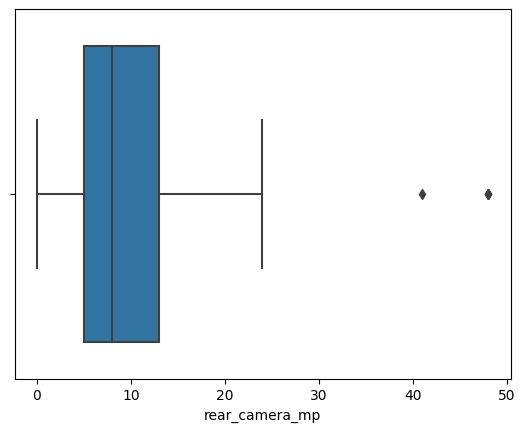

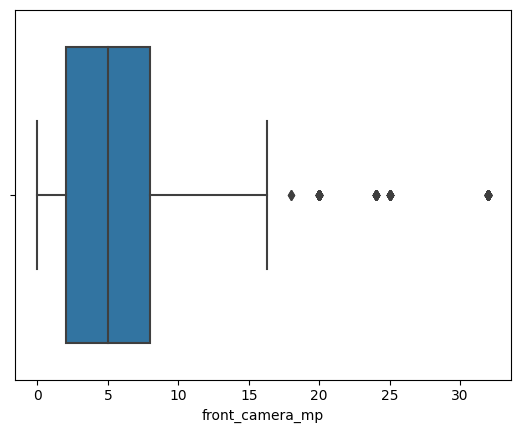

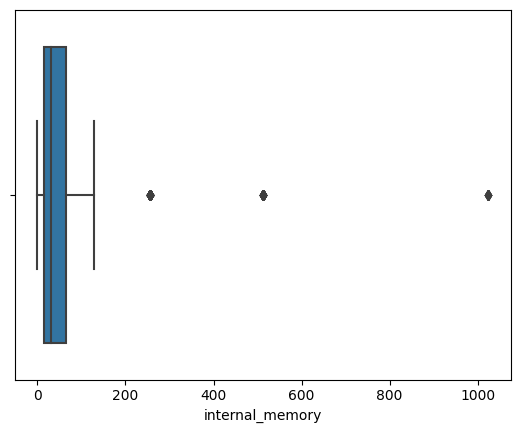

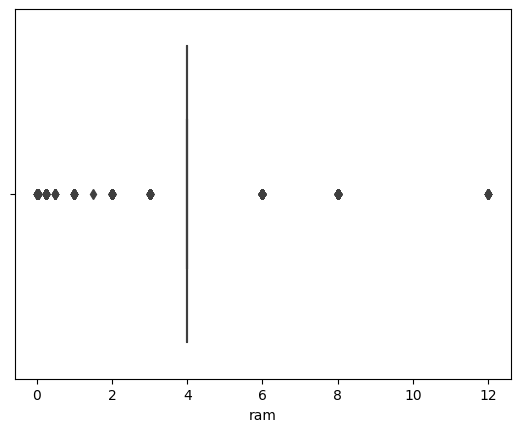

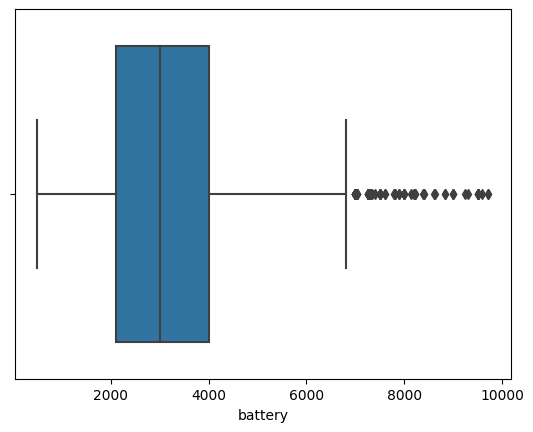

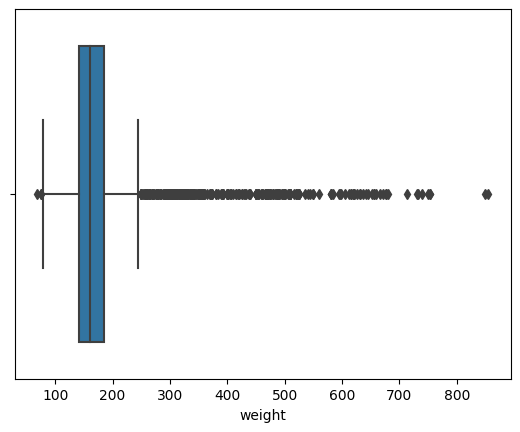

In [10]:
features = ['rear_camera_mp','front_camera_mp','internal_memory','ram','battery','weight']

for i in features:
    sns.boxplot(x=usedPhones[i])
    plt.show()

**There is some null value in features, removing those won't be a correct option as there is only have less rows**

**Better replace the values with median values because median values are not affected by outliers**

In [11]:
for i in features:
    a=usedPhones[i].median()
    print(i,'new value : ', a)
    usedPhones[i]= usedPhones[i].fillna(a)

rear_camera_mp new value :  8.0
front_camera_mp new value :  5.0
internal_memory new value :  32.0
ram new value :  4.0
battery new value :  3000.0
weight new value :  160.0


**Use IQR to overcome outliers and check the dataset size after dropped the outliers**

In [12]:
features=['screen_size','front_camera_mp','ram','battery','weight','normalized_used_price','normalized_new_price']
for i in features:
    lower = usedPhones[i].quantile(0.10)
    upper = usedPhones[i].quantile(0.90)
    usedPhones[i] = np.where(usedPhones[i] <lower, lower,usedPhones[i])
    usedPhones[i] = np.where(usedPhones[i] >upper, upper,usedPhones[i])
 
usedPhones.shape

(3454, 15)

**Treat internal_memory, battery and rear_camera_mp with different calculation, because they have different skewness outliers**

In [13]:
upper= usedPhones.rear_camera_mp.quantile(0.95)
usedPhones.rear_camera_mp= np.where(usedPhones.rear_camera_mp>upper,upper,usedPhones.rear_camera_mp)

upper= usedPhones.internal_memory.quantile(0.9)
usedPhones.internal_memory= np.where(usedPhones.internal_memory>upper,upper,usedPhones.internal_memory)

upper= usedPhones.weight.quantile(0.8)
usedPhones.weight= np.where(usedPhones.weight>upper,upper,usedPhones.weight)

**Check the outliers again by flatten the 2D array of subplots to make them easier to access**

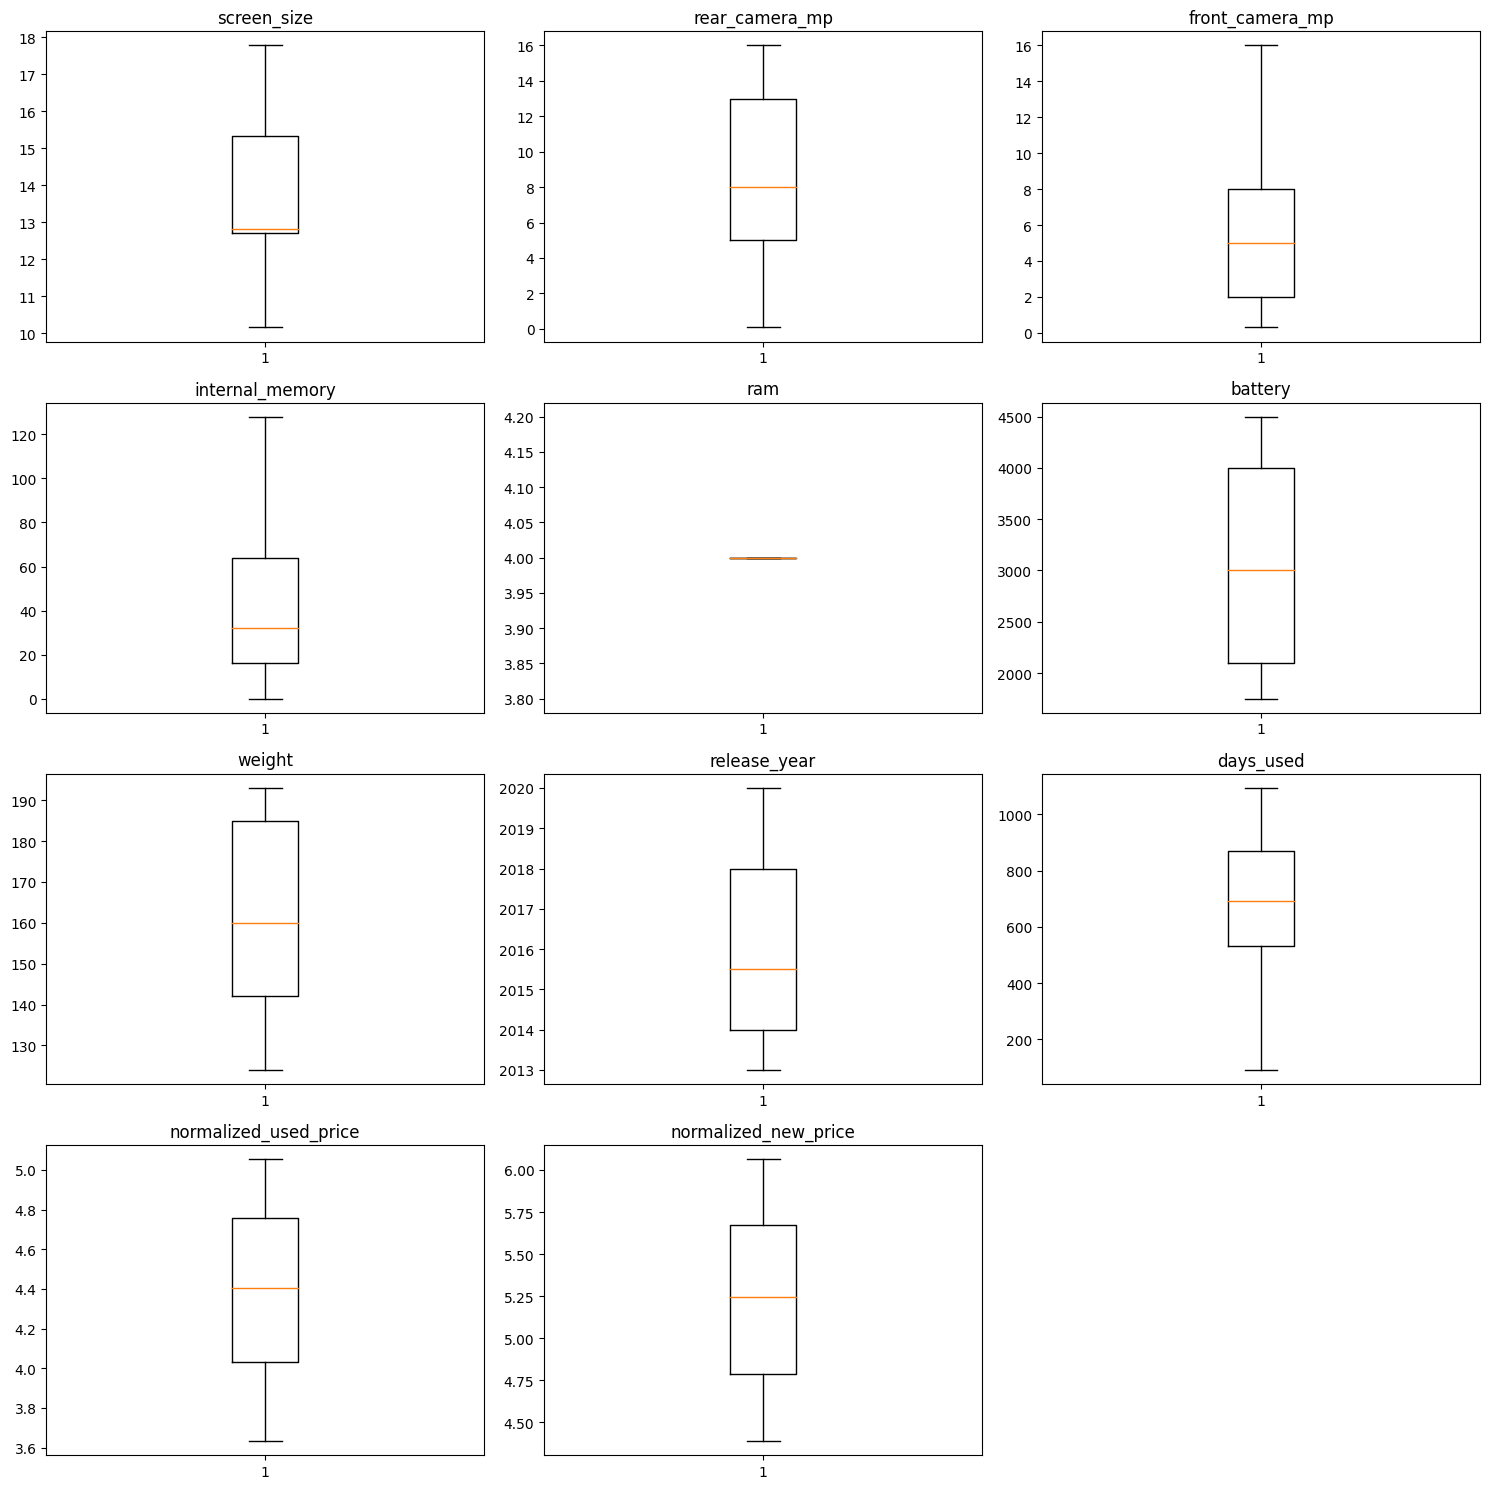

In [14]:
fig,axs= plt.subplots(4,3,figsize=(15, 15))
num_features=[feature for feature in usedPhones.columns if usedPhones[feature].dtype != 'O']
axs = axs.ravel()
for i, feature in enumerate(num_features):
    
    axs[i].boxplot(usedPhones[feature])
    axs[i].set_title(feature)

# method used to remove an axis from a figure
fig.delaxes(axs[-1])
# Adjust the spacing between subplots
plt.tight_layout()
# Show the plot
plt.show()

## Univariate Analysis

**Count device_brand data percentage and visuallize bar chart**

            Total sample  percentage
Others               502        14.5
Samsung              341         9.9
Huawei               251         7.3
LG                   201         5.8
Lenovo               171         5.0
ZTE                  140         4.1
Xiaomi               132         3.8
Oppo                 129         3.7
Asus                 122         3.5
Alcatel              121         3.5
Micromax             117         3.4
Vivo                 117         3.4
Honor                116         3.4
HTC                  110         3.2
Nokia                106         3.1
Motorola             106         3.1
Sony                  86         2.5
Meizu                 62         1.8
Gionee                56         1.6
Acer                  51         1.5
XOLO                  49         1.4
Panasonic             47         1.4
Realme                41         1.2
Apple                 39         1.1
Lava                  36         1.0
Celkon                33         1.0
S

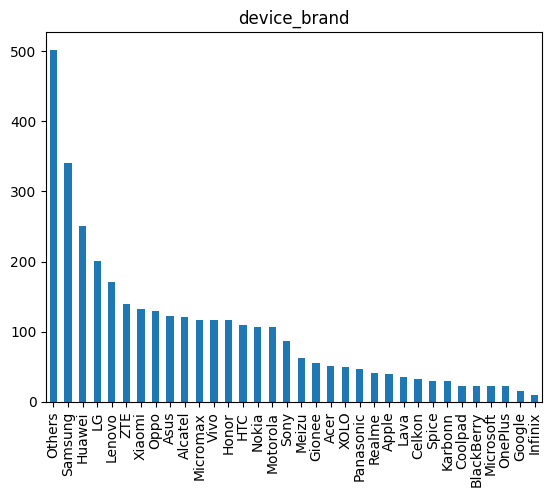

In [15]:
numerical_features = ['normalized_used_price', 'normalized_new_price', 'screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory', 'battery', 'weight', 'release_year', 'days_used']
categorical_features = ['device_brand', 'os', '4g', '5g', 'ram']

feature = categorical_features[0]
count = usedPhones[feature].value_counts()
percent = 100*usedPhones[feature].value_counts(normalize=True)
df = pd.DataFrame({'Total sample':count, 'percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Count os data percentage and visuallize bar chart**

         Total sample  percentage
Android          3214        93.1
Others            137         4.0
Windows            67         1.9
iOS                36         1.0


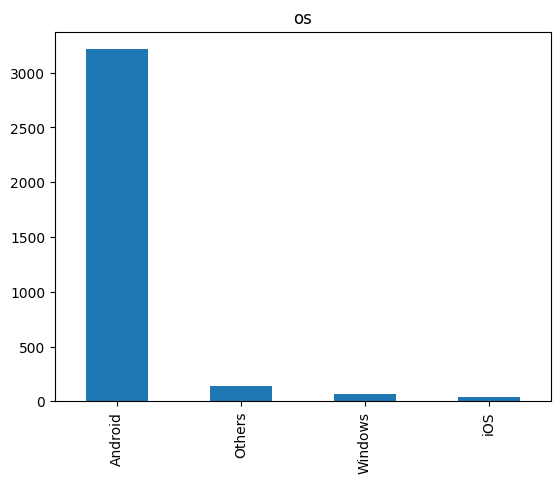

In [16]:
feature = categorical_features[1]
count = usedPhones[feature].value_counts()
percent = 100*usedPhones[feature].value_counts(normalize=True)
df = pd.DataFrame({'Total sample':count, 'percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Count 4g data percentage and visuallize bar chart**

     Total sample  percentage
yes          2335        67.6
no           1119        32.4


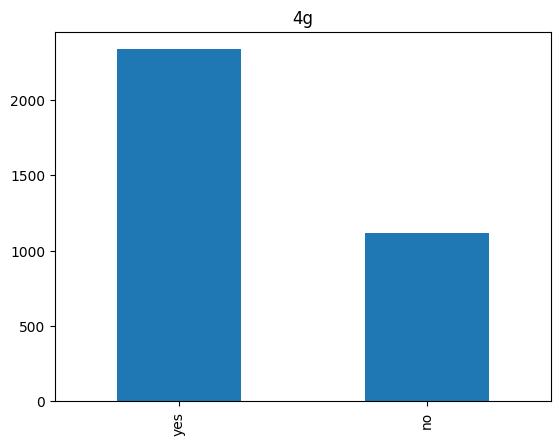

In [17]:
feature = categorical_features[2]
count = usedPhones[feature].value_counts()
percent = 100*usedPhones[feature].value_counts(normalize=True)
df = pd.DataFrame({'Total sample':count, 'percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Count 5g data percentage**

     Total sample  percentage
no           3302        95.6
yes           152         4.4


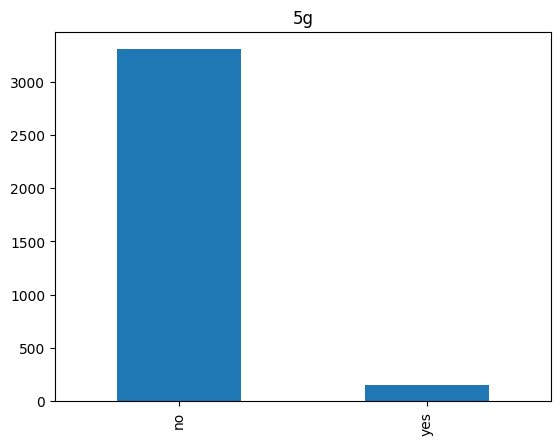

In [18]:
feature = categorical_features[3]
count = usedPhones[feature].value_counts()
percent = 100*usedPhones[feature].value_counts(normalize=True)
df = pd.DataFrame({'Total sample':count, 'percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

**Visuallize bar chart numerical_features**

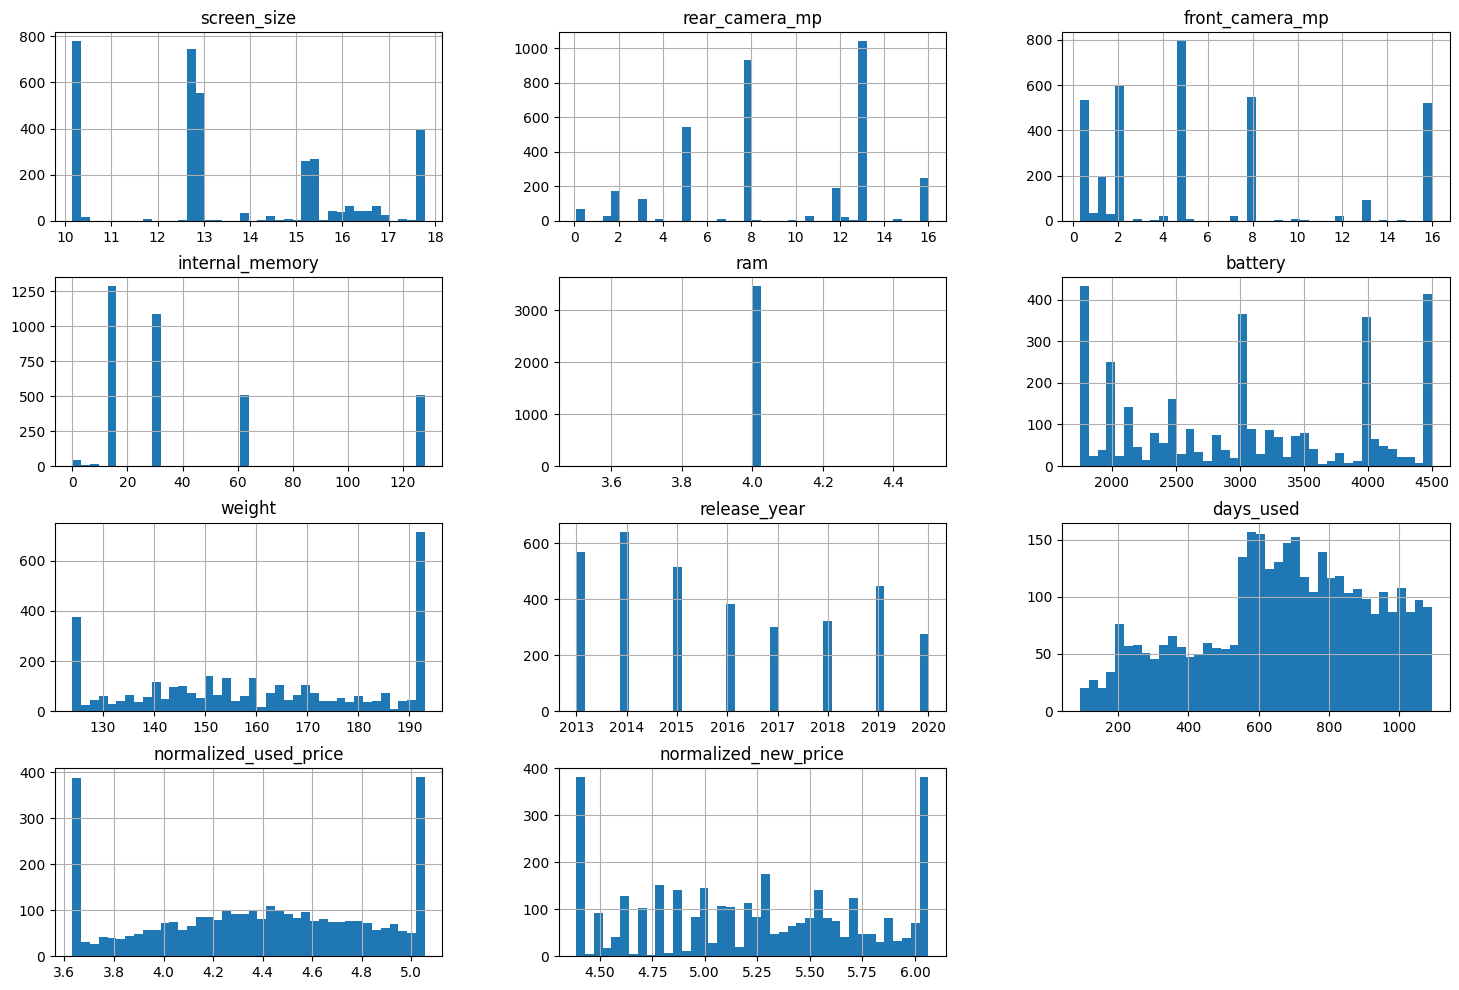

In [19]:
usedPhones.hist(bins=40, figsize=(18,12))
plt.show()

## Multivariate Analysis

**Compare mean normalized_used_price with each features**

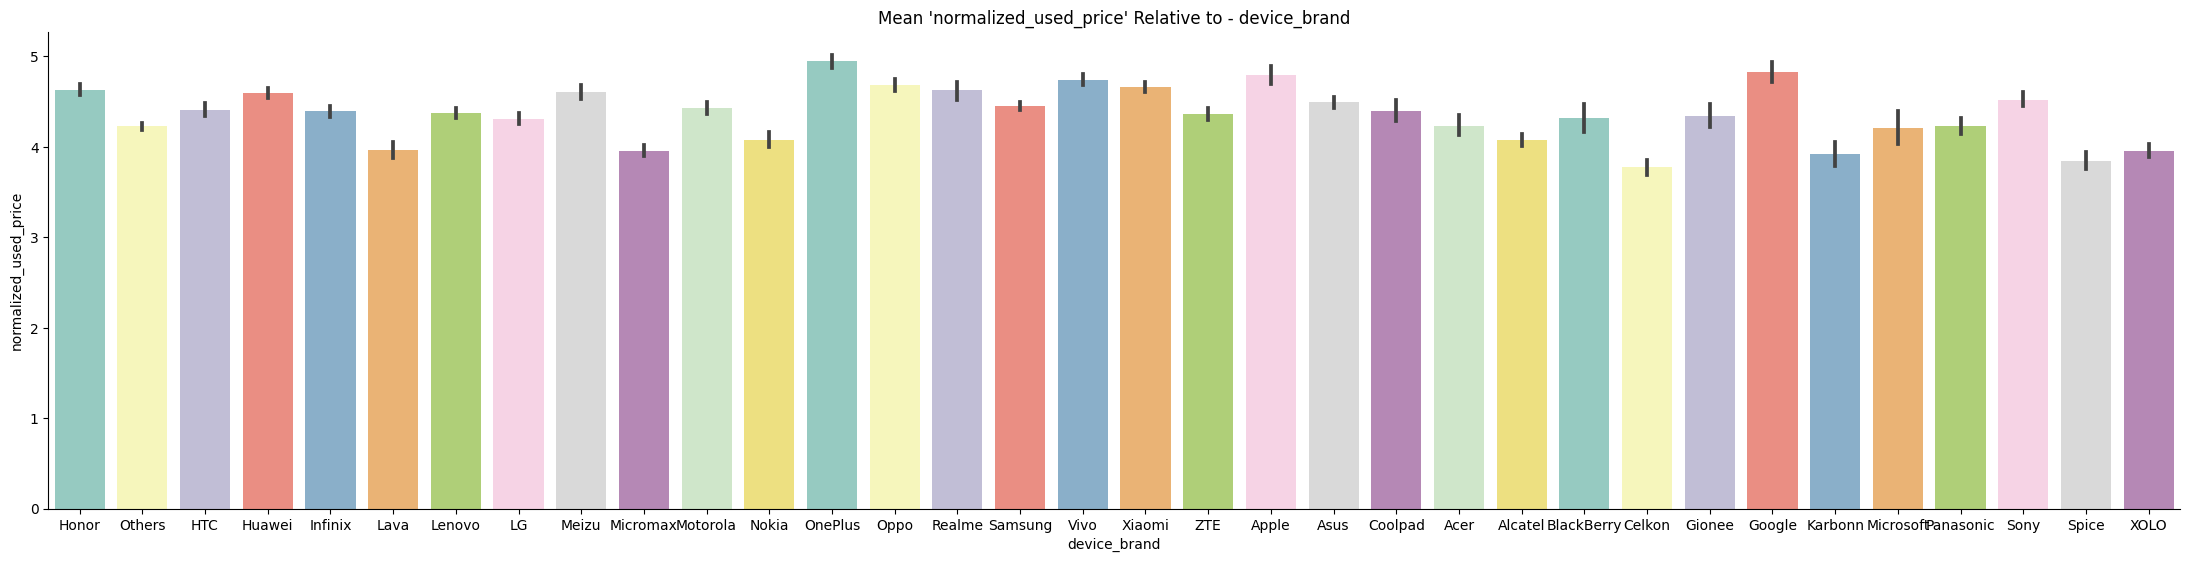

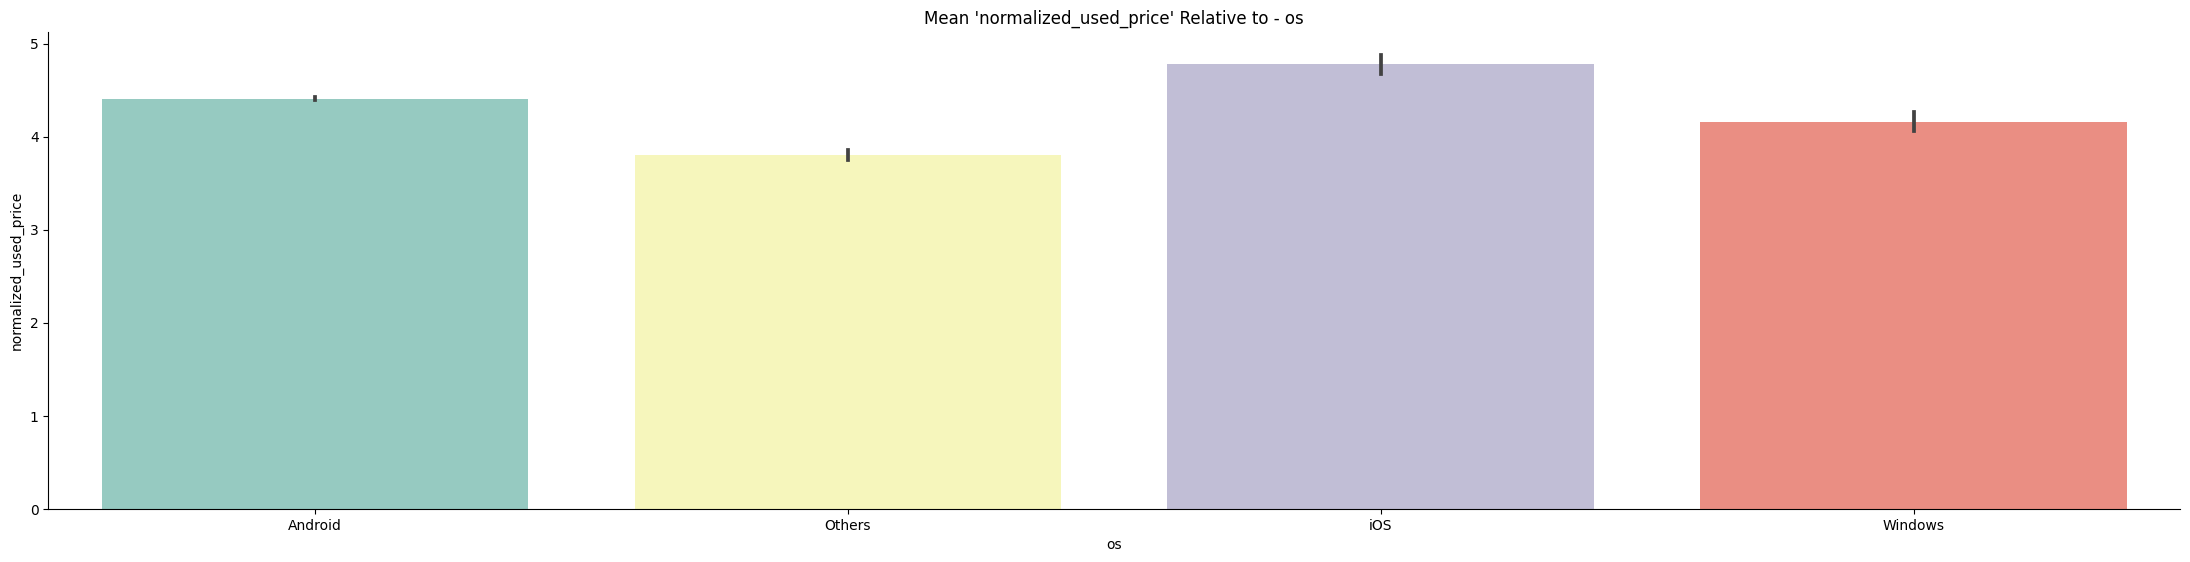

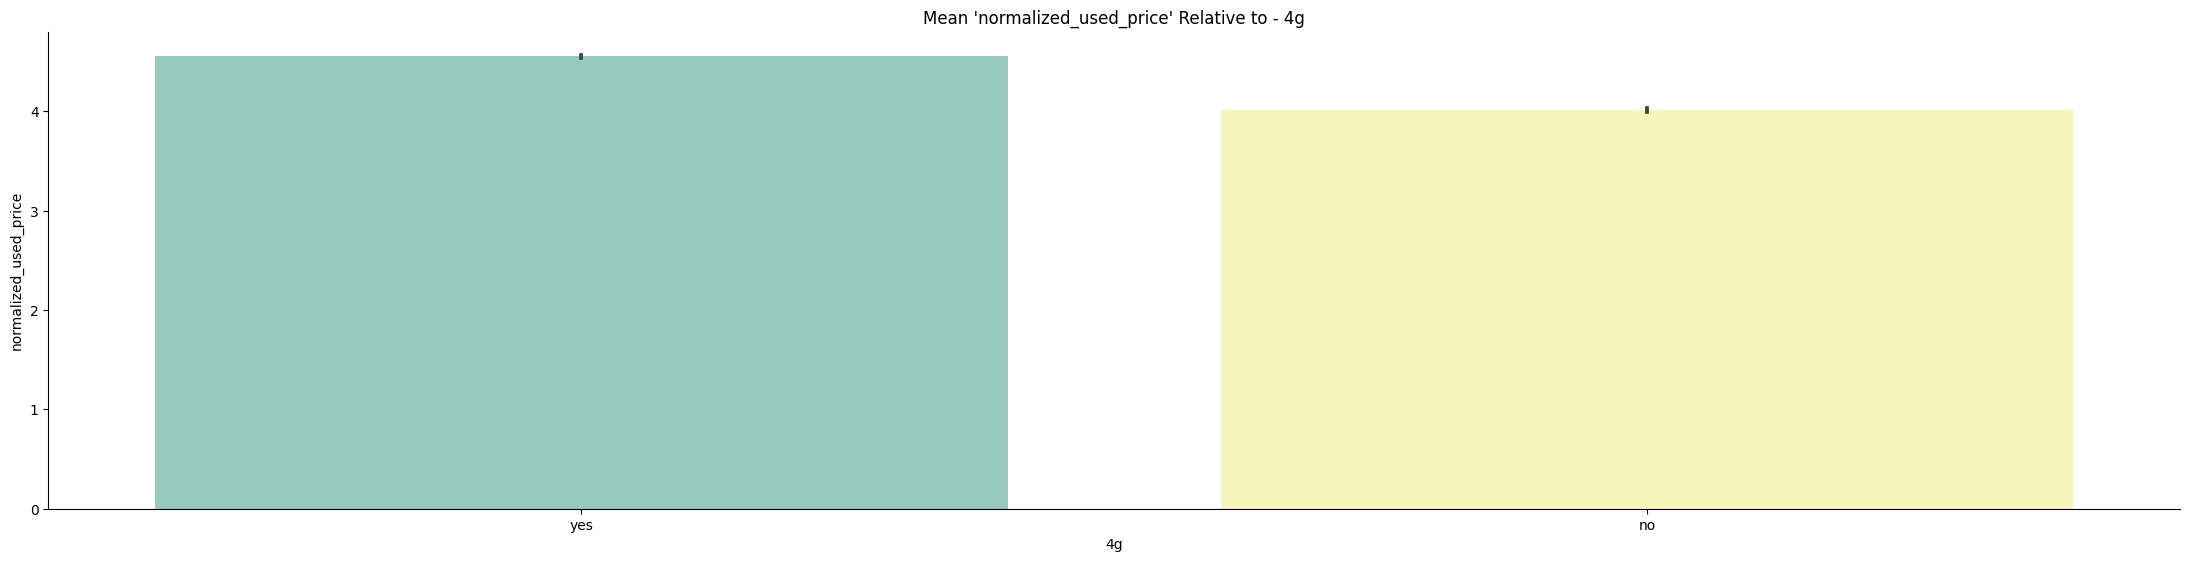

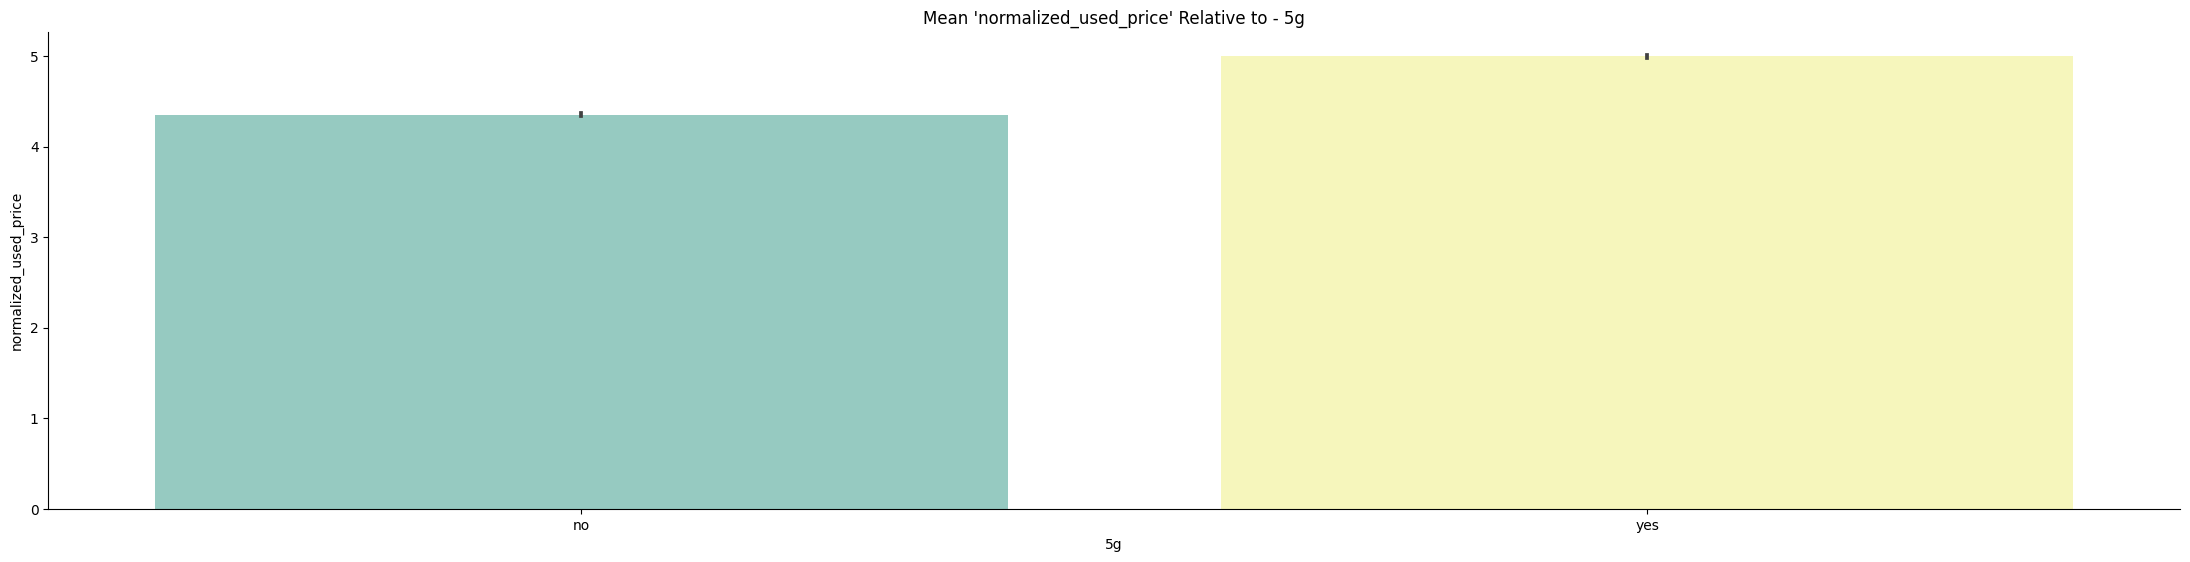

In [20]:
cat_features = usedPhones.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="normalized_used_price", kind="bar", dodge=False, height = 5.5, aspect = 4,  data=usedPhones, palette="Set3")
  plt.title("Mean 'normalized_used_price' Relative to - {}".format(col))

**Check relation per features with normalized_used_price**

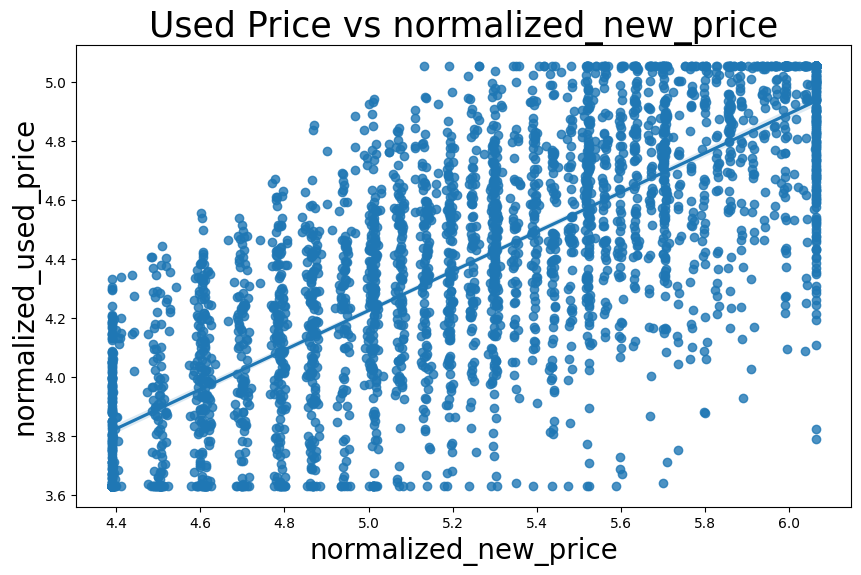

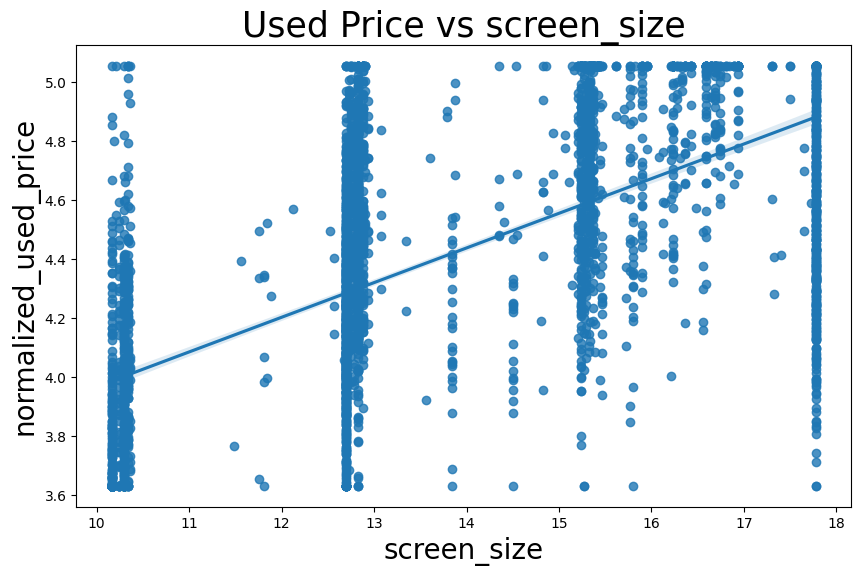

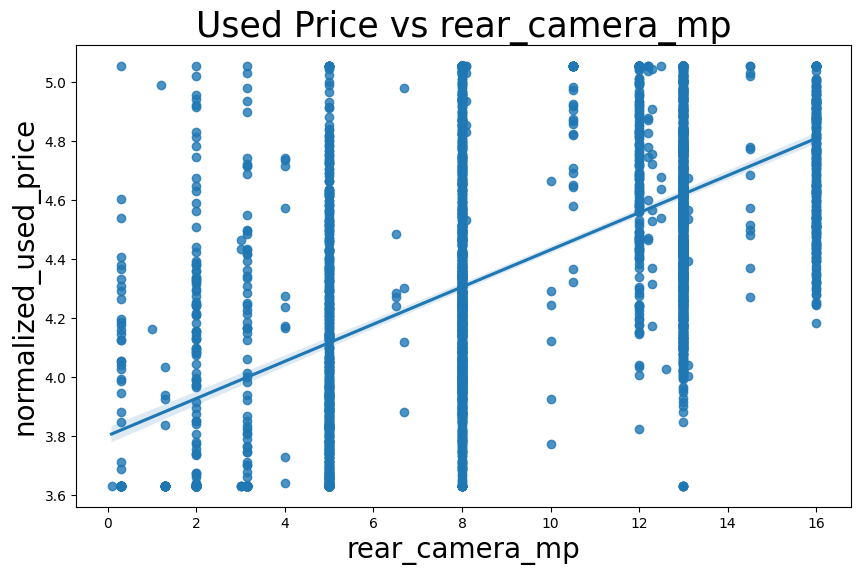

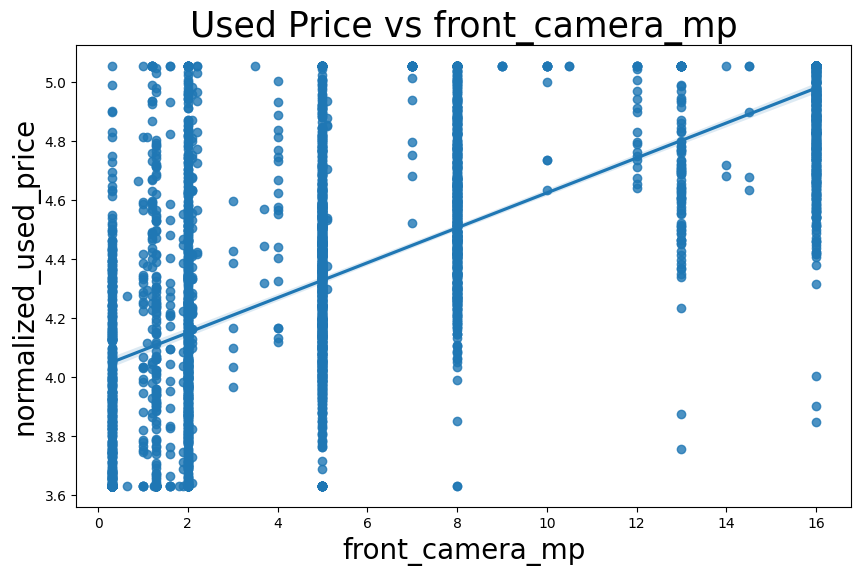

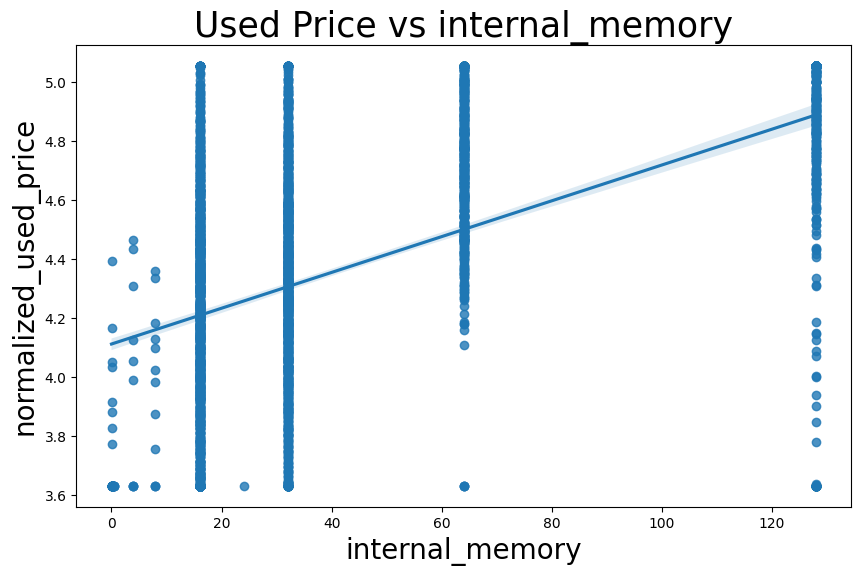

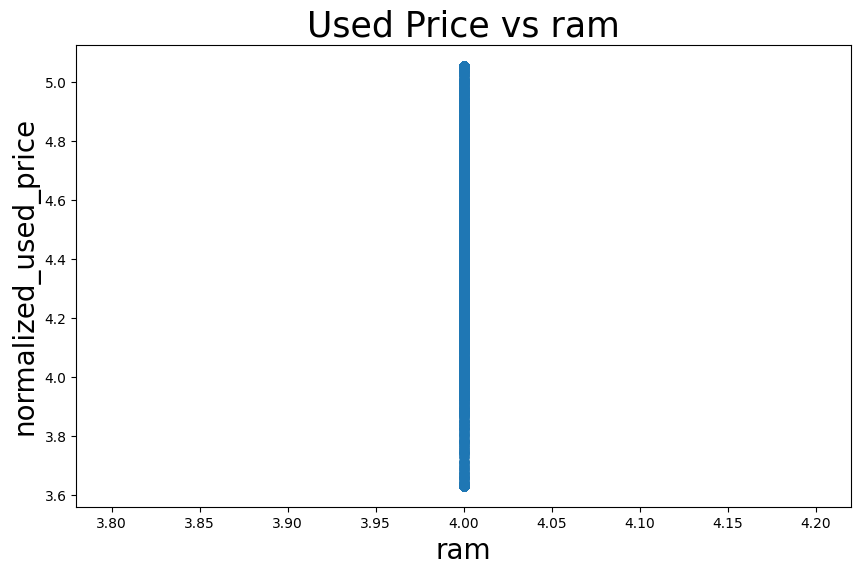

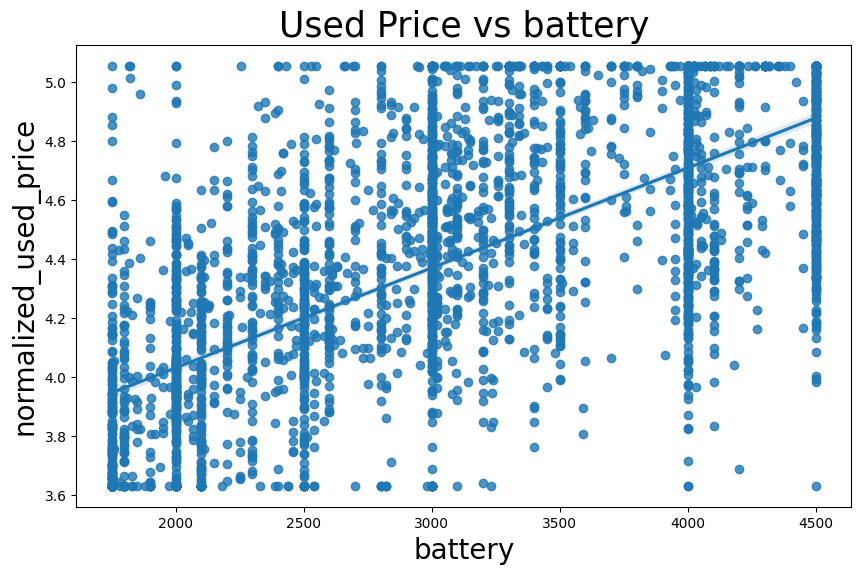

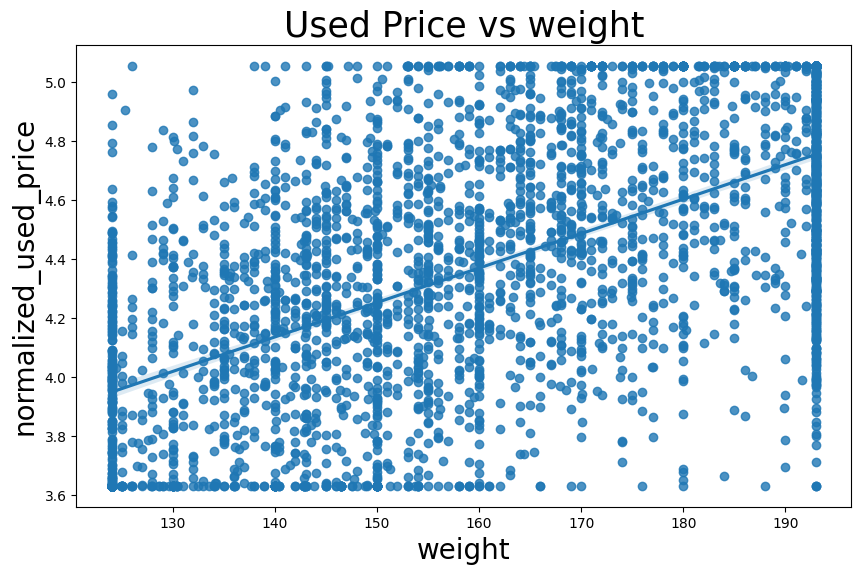

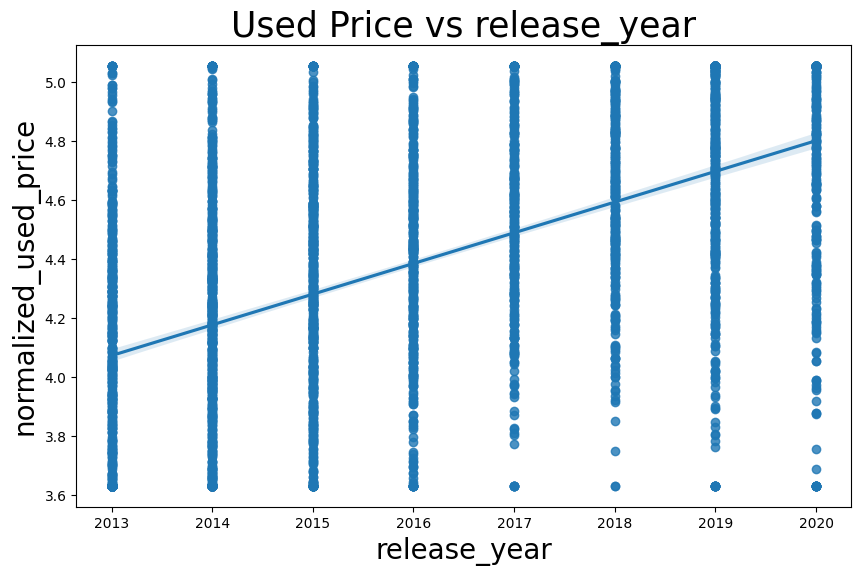

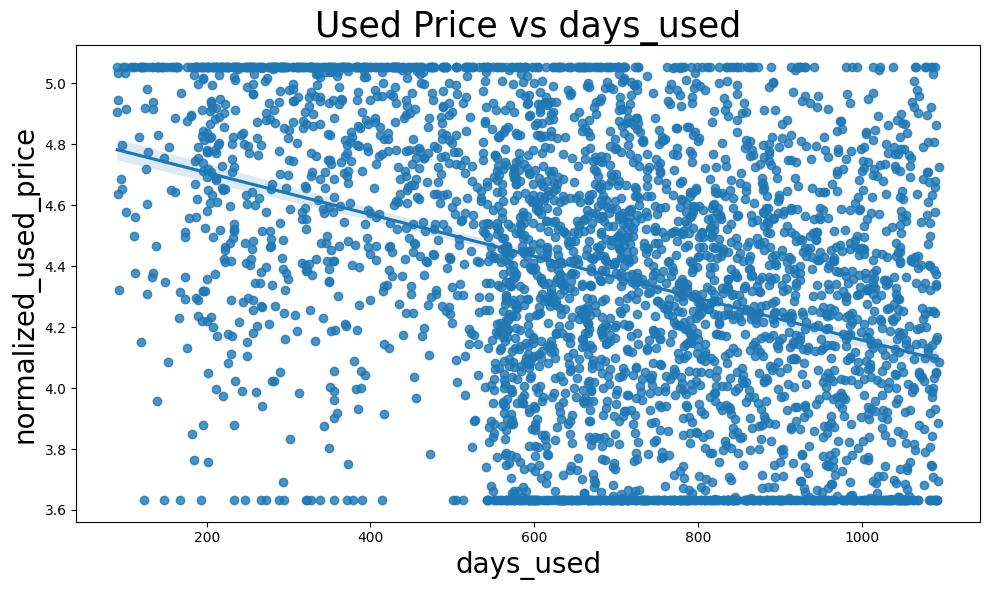

In [21]:
def bivariate_analysis(x):
    plt.figure(figsize=(10,6))
    ax = sns.regplot(x=x, y='normalized_used_price',data=usedPhones)
    ax.set_title("Used Price vs "+x, fontsize=25)
    ax.set_xlabel(x, fontsize=20)
    ax.set_ylabel('normalized_used_price', fontsize=20)
    plt.locator_params(axis='x', nbins=10)

cols = ['normalized_new_price', 'screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used']
for x in cols:
    bivariate_analysis(x)
plt.tight_layout()

**Observe between numeric features with pairplot method**

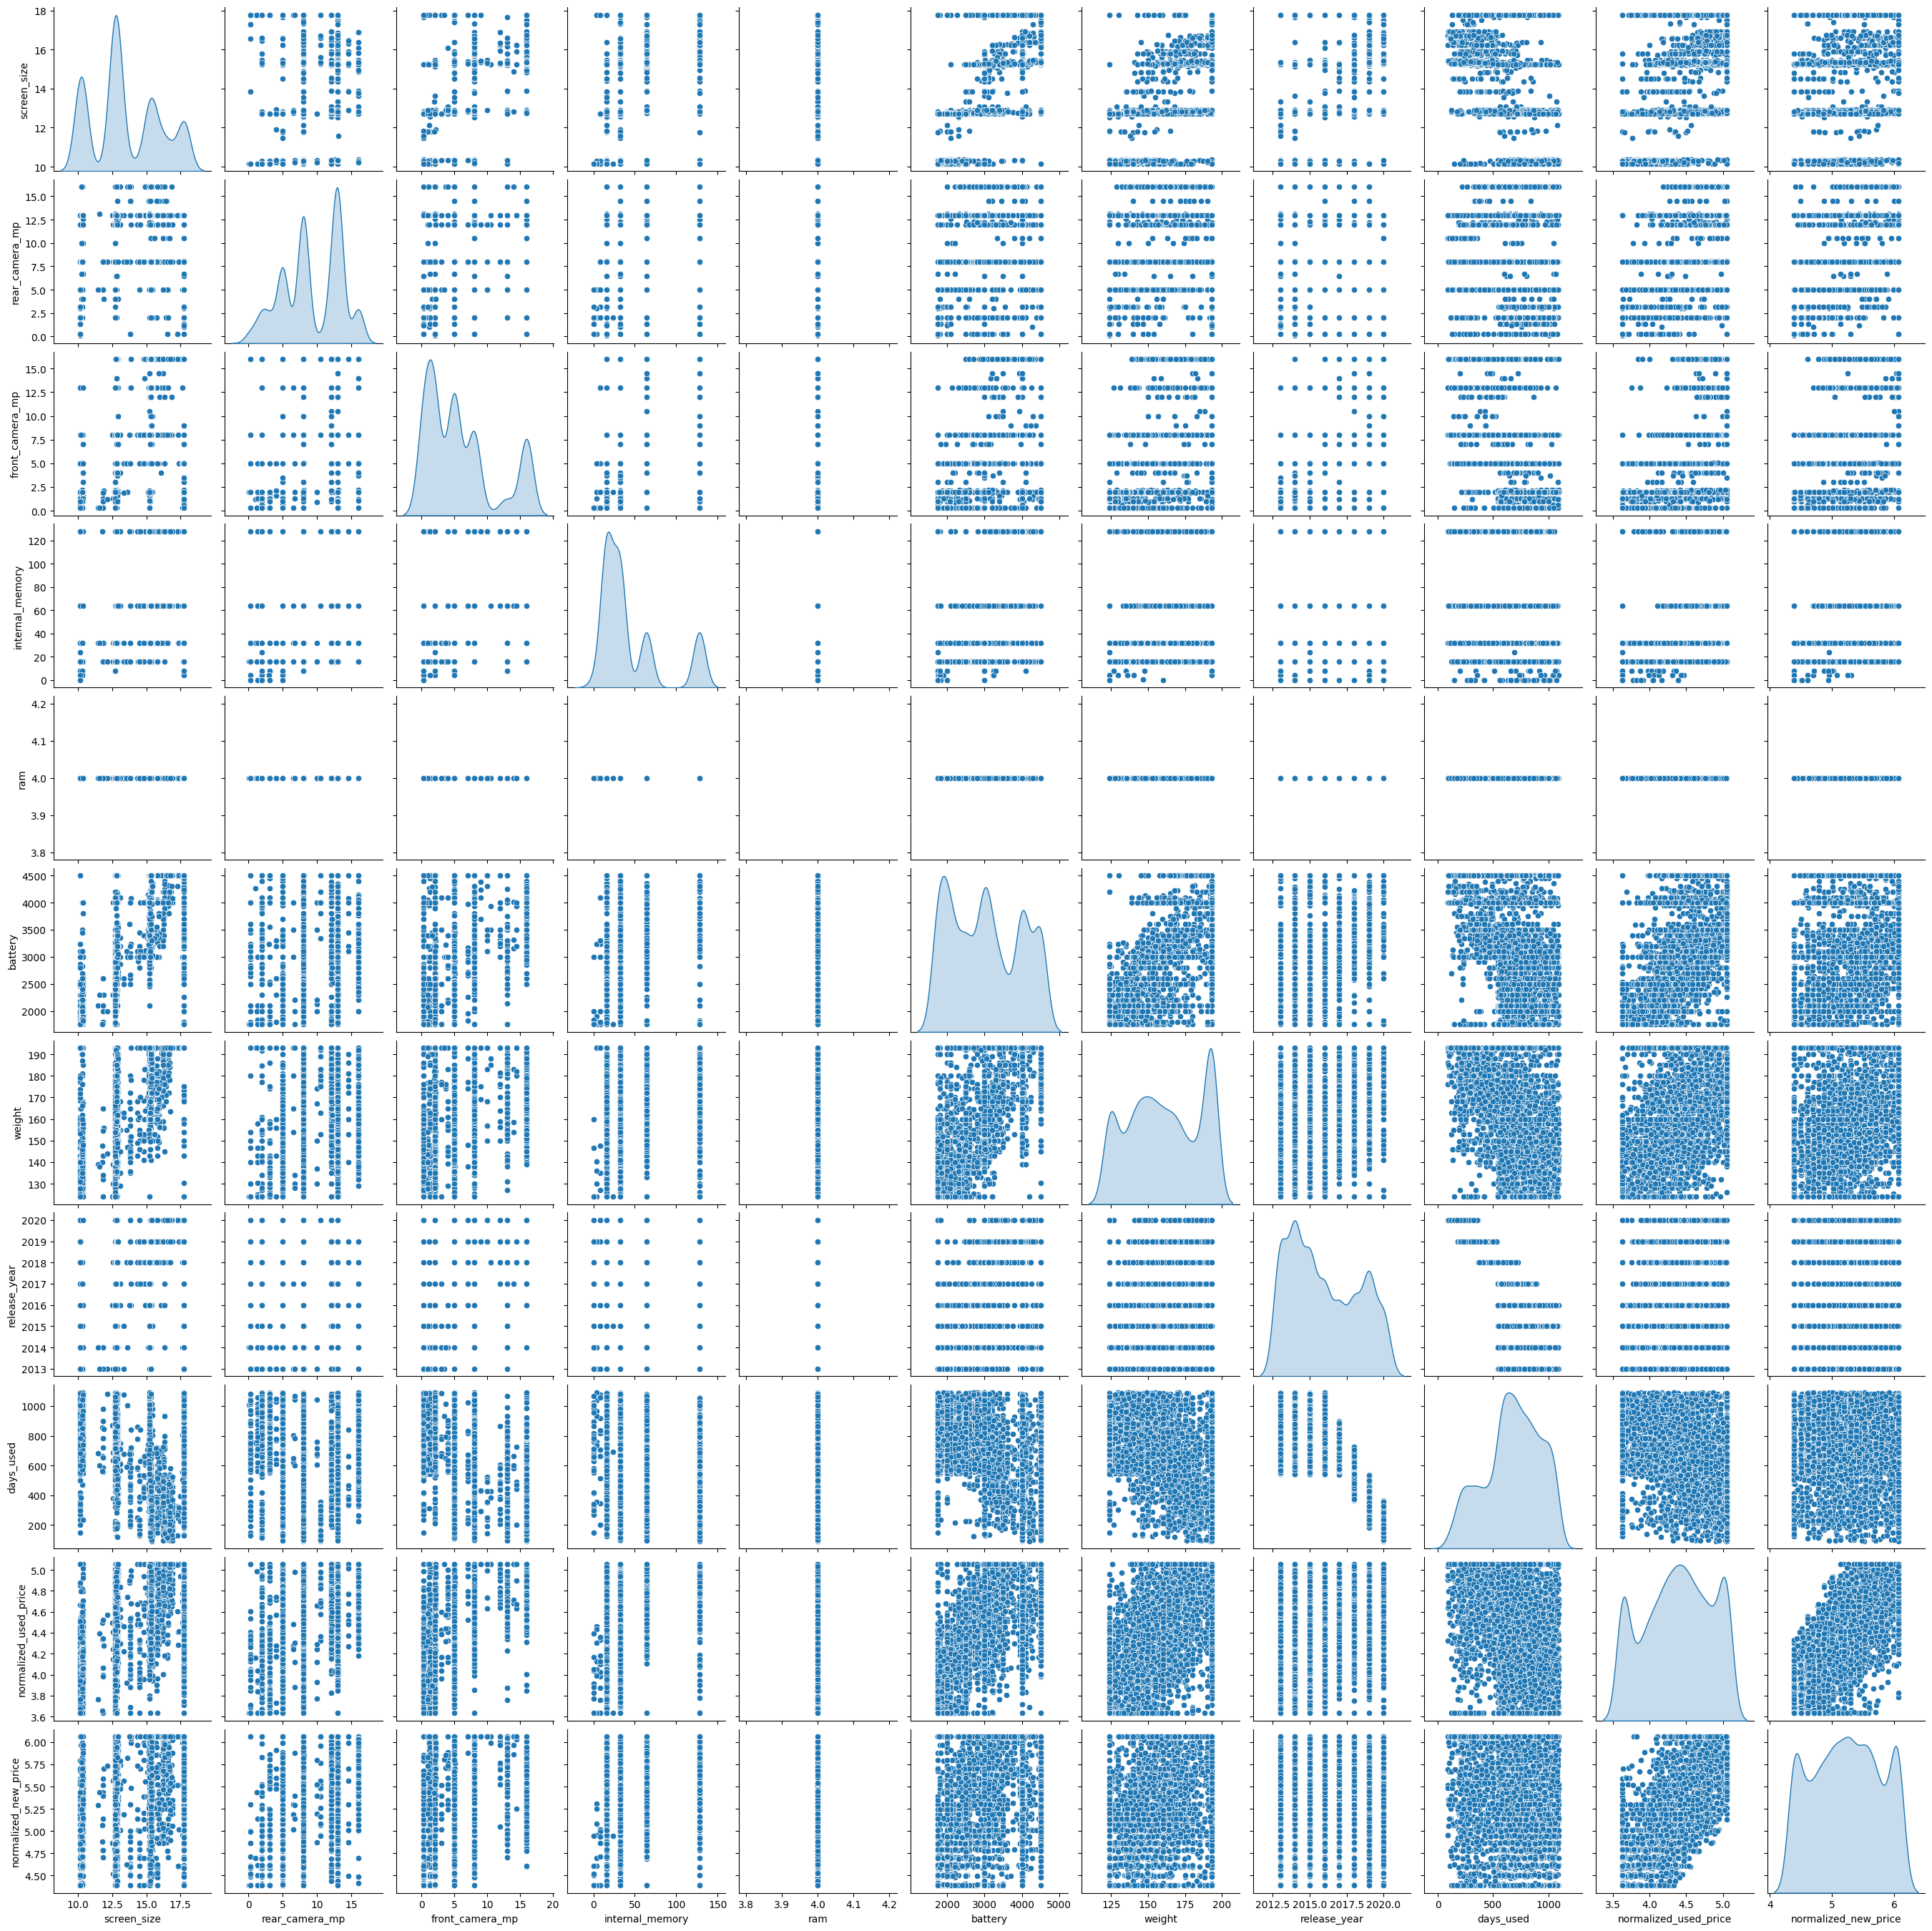

In [22]:
sns.pairplot(usedPhones, diag_kind = 'kde')

**See value correlation matrix using sns.heatmap**

<ipython-input-23-fef1f9108aa2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = usedPhones.corr().round(2)


Text(0.5, 1.0, 'Correlation matrix for numerical features ')

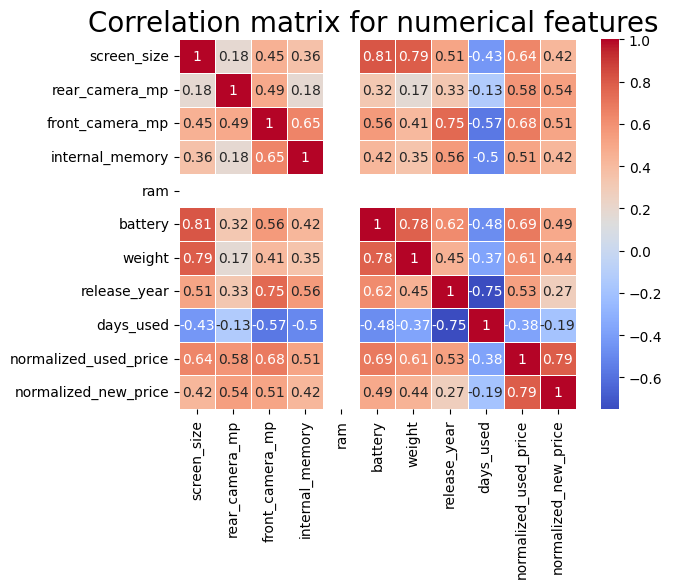

In [23]:
correlation_matrix = usedPhones.corr().round(2)
 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation matrix for numerical features ", size=20)

**Because Ram has no line as it has most values on 4, better dropped**

In [24]:
usedPhones.drop(['ram'], axis=1, inplace=True)
usedPhones

device_brand       os  screen_size   4g   5g  rear_camera_mp  \
0           Honor  Android        14.50  yes   no            13.0   
1           Honor  Android        17.30  yes  yes            13.0   
2           Honor  Android        16.69  yes  yes            13.0   
3           Honor  Android        17.78  yes  yes            13.0   
4           Honor  Android        15.32  yes   no            13.0   
...           ...      ...          ...  ...  ...             ...   
3449         Asus  Android        15.34  yes   no             8.0   
3450         Asus  Android        15.24  yes   no            13.0   
3451      Alcatel  Android        15.80  yes   no            13.0   
3452      Alcatel  Android        15.80  yes   no            13.0   
3453      Alcatel  Android        12.83  yes   no            13.0   

      front_camera_mp  internal_memory  battery  weight  release_year  \
0                 5.0             64.0   3020.0   146.0          2020   
1                16.0            128.0   4300.0   193.0          2020   
2                 8.0            128.0   4200.0   193.0          2020   
3                 8.0             64.0   4500.0   193.0          2020   
4                 8.0             64.0   4500.0   185.0          2020   
...               ...              ...      ...     ...           ...   
3449              8.0             64.0   4500.0   190.0          2019   
3450              8.0            128.0   4000.0   193.0          2018   
3451              5.0             32.0   4000.0   165.0          2020   
3452              5.0             32.0   4000.0   160.0          2020   
3453              5.0             16.0   4000.0   168.0          2020   

      days_used  normalized_used_price  normalized_new_price  
0           127               4.307572              4.715100  
1           325               5.054027              5.519018  
2           162               5.054027              5.884631  
3           345               5.054027              5.630961  
4           293               4.389995              4.947837  
...         ...                    ...                   ...  
3449        232               4.492337              6.063911  
3450        541               5.037732              6.063911  
3451        201               4.357350              4.528829  
3452        149               4.349762              4.624188  
3453        176               4.132122              4.388915  

[3454 rows x 14 columns]

## Data Preparation

**Change 4g and 5g categorical to 0 & 1 value**

In [25]:
dict_cat_symbol = {'yes':1,'no':0}
usedPhones['4g'] = usedPhones['4g'].map(dict_cat_symbol)
usedPhones['5g'] = usedPhones['5g'].map(dict_cat_symbol)

**Applied one hot encoding into categorical features**

In [26]:
from sklearn.preprocessing import  OneHotEncoder

usedPhones = pd.concat([usedPhones, pd.get_dummies(usedPhones['device_brand'], prefix='device_brand')],axis=1)
usedPhones = pd.concat([usedPhones, pd.get_dummies(usedPhones['os'], prefix='os')],axis=1)
usedPhones.drop(['device_brand','os'], axis=1, inplace=True)
usedPhones.head()

screen_size  4g  5g  rear_camera_mp  front_camera_mp  internal_memory  \
0        14.50   1   0            13.0              5.0             64.0   
1        17.30   1   1            13.0             16.0            128.0   
2        16.69   1   1            13.0              8.0            128.0   
3        17.78   1   1            13.0              8.0             64.0   
4        15.32   1   0            13.0              8.0             64.0   

   battery  weight  release_year  days_used  ...  device_brand_Sony  \
0   3020.0   146.0          2020        127  ...                  0   
1   4300.0   193.0          2020        325  ...                  0   
2   4200.0   193.0          2020        162  ...                  0   
3   4500.0   193.0          2020        345  ...                  0   
4   4500.0   185.0          2020        293  ...                  0   

   device_brand_Spice  device_brand_Vivo  device_brand_XOLO  \
0                   0                  0                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  0   

   device_brand_Xiaomi  device_brand_ZTE  os_Android  os_Others  os_Windows  \
0                    0                 0           1          0           0   
1                    0                 0           1          0           0   
2                    0                 0           1          0           0   
3                    0                 0           1          0           0   
4                    0                 0           1          0           0   

   os_iOS  
0       0  
1       0  
2       0  
3       0  
4       0  

[5 rows x 50 columns]

Visualize features which has a high correlation

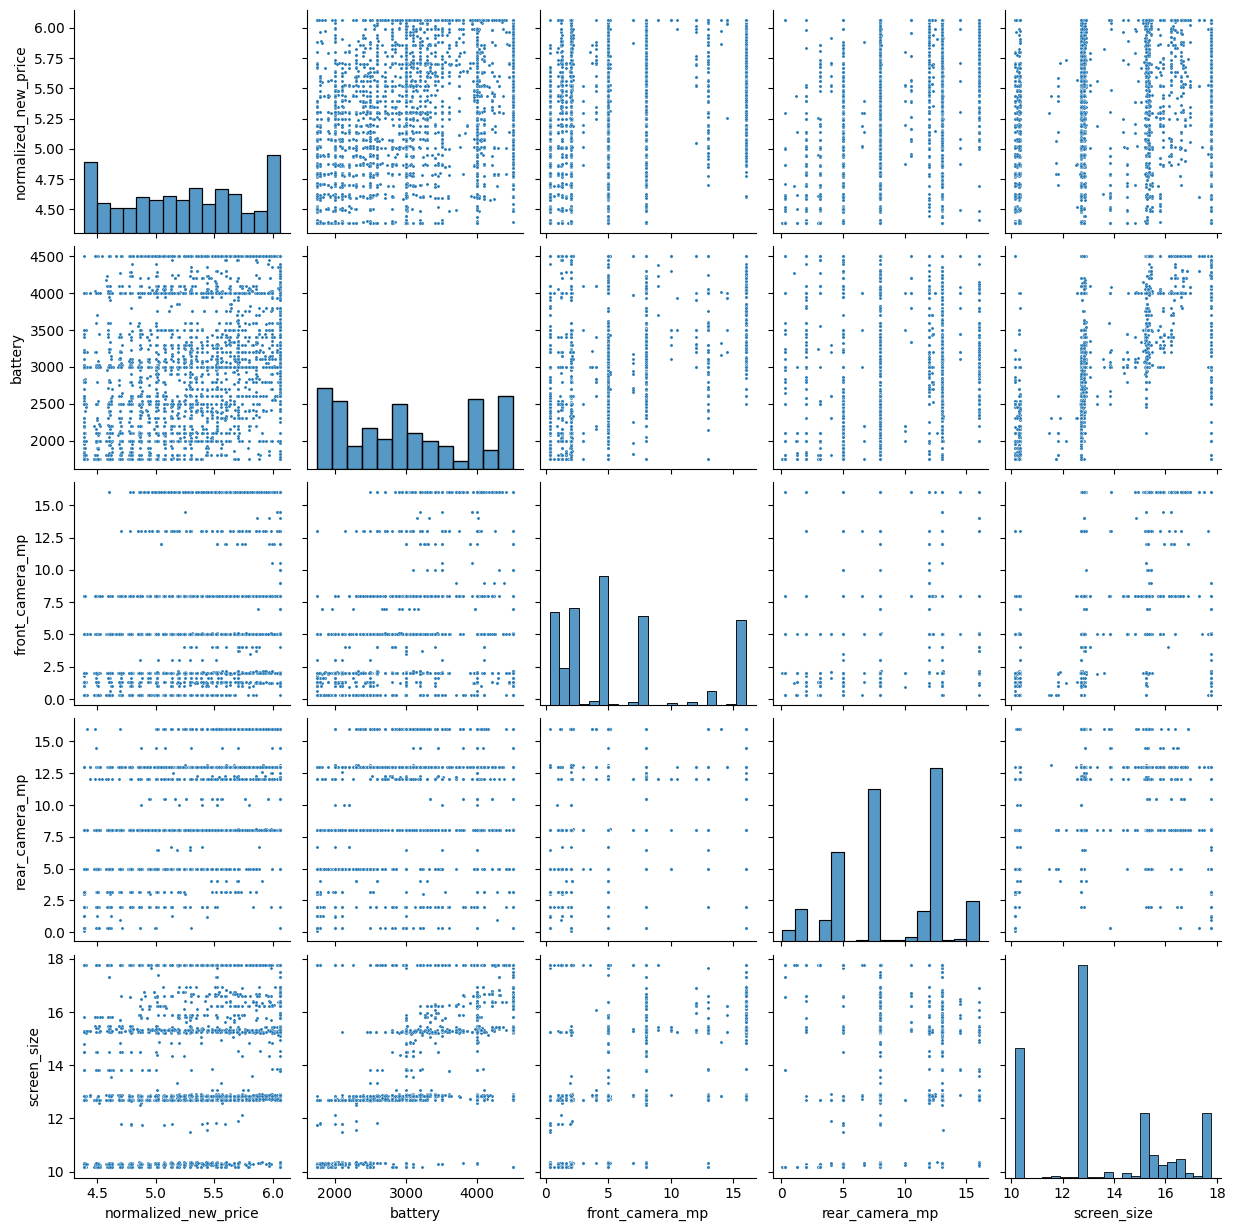

In [27]:
dimension_features = ['normalized_new_price', 'battery','front_camera_mp','rear_camera_mp','screen_size']
sns.pairplot(usedPhones[dimension_features], plot_kws={"s": len(dimension_features)})

**Dimension reduction with PCA to reduce the number of features while retaining the information in the data**

In [28]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=len(dimension_features), random_state=12345)
pca.fit(usedPhones[dimension_features])
princ_comp = pca.transform(usedPhones[dimension_features])

**Check the proportion of information from the three components earlier.**

In [29]:
pca.explained_variance_ratio_.round(5)

array([9.9996e-01, 3.0000e-05, 1.0000e-05, 0.0000e+00, 0.0000e+00])

Create new feature dimension and transform using pca

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=12345)
pca.fit(usedPhones[dimension_features])
usedPhones['dimension'] = pca.transform(usedPhones.loc[:, (dimension_features)]).flatten()
usedPhones.drop(dimension_features, axis=1, inplace=True)

Split data to train, test, split with proportion 95:5

In [31]:
from sklearn.model_selection import train_test_split
 
X = usedPhones.drop(["normalized_used_price"],axis =1)
y = usedPhones["normalized_used_price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 12345)

In [32]:
print(f'Total sample in whole dataset: {len(X)}')
print(f'Total sample in train dataset: {len(X_train)}')
print(f'Total sample in test dataset: {len(X_test)}')

Total sample in whole dataset: 3454
Total sample in train dataset: 3281
Total sample in test dataset: 173


## Scaling and Normalization

**Scaling and Normalization numerical_features using MinMaxScaler only for data train**

In [33]:
from sklearn.preprocessing import MinMaxScaler
 
numerical_features = ['weight','release_year','internal_memory','days_used','dimension']
scaler = MinMaxScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

weight  release_year  internal_memory  days_used  dimension
595   1.000000      0.285714         0.499961   0.830508   0.636365
92    0.579710      0.857143         0.249941   0.118644   0.818173
2954  0.884058      0.571429         1.000000   0.584247   0.599997
808   1.000000      0.000000         0.124932   0.581256   0.799984
2457  1.000000      0.428571         0.124932   0.820538   0.999979

**Describe data train numerical_features**

In [34]:
X_train[numerical_features].describe().round(4)

weight  release_year  internal_memory  days_used  dimension
count  3281.0000     3281.0000        3281.0000  3281.0000  3281.0000
mean      0.5346        0.4222           0.3473     0.5819     0.4641
std       0.3422        0.3283           0.3000     0.2472     0.3350
min       0.0000        0.0000           0.0000     0.0000     0.0000
25%       0.2609        0.1429           0.1249     0.4427     0.1273
50%       0.5217        0.2857           0.2499     0.5972     0.4545
75%       0.8841        0.7143           0.5000     0.7737     0.8182
max       1.0000        1.0000           1.0000     1.0000     1.0000

## Model Development using K-Nearest Neighbor

**Prepare dataframe for analysis model**

In [35]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'Boosting', 'LinearRegression', 'SVR'])

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Model Development using Ada Boosting Regressor

**Create prediction model using Boosting Algorithm**

In [37]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Model Development using LinearRegression

**Create prediction model using LinearRegression Algorithm**

In [38]:
from sklearn.linear_model import LinearRegression
 
LG = LinearRegression()                             
LG.fit(X_train, y_train)
models.loc['train_mse','LinearRegression'] = mean_squared_error(y_pred=LG.predict(X_train), y_true=y_train)

# Model Development using Support Vector Regression

**Create prediction model using Support Vector Regression Algorithm**

In [39]:
from sklearn.svm import SVR
 
SVR = SVR()                             
SVR.fit(X_train, y_train)
models.loc['train_mse','SVR'] = mean_squared_error(y_pred=SVR.predict(X_train), y_true=y_train)

## Evaluate Model

**Do the scaling of the numeric features in X_test so that it has mean=0 dan variance=1**

In [40]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

**Create an mse variable whose contents are the dataframe values of the mse data train and test for each algorithm**

In [41]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','Boosting','LinearRegression','SVR'])
 
# Create a dictionary for each algorithm used
model_dict = {'KNN': knn, 'Boosting': boosting, 'LinearRegression': LG, 'SVR': SVR}
 
# Calculate the Mean Squared Error of each algorithm on the train and test data
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))
 
# Call mse
mse

train      test
KNN                0.05811  0.065104
Boosting          0.069419  0.072668
LinearRegression   0.07162  0.063508
SVR               0.054929  0.057349

## Predict Model

**Plot errors count of RandomForest, Boosting and KNN Algorithm**

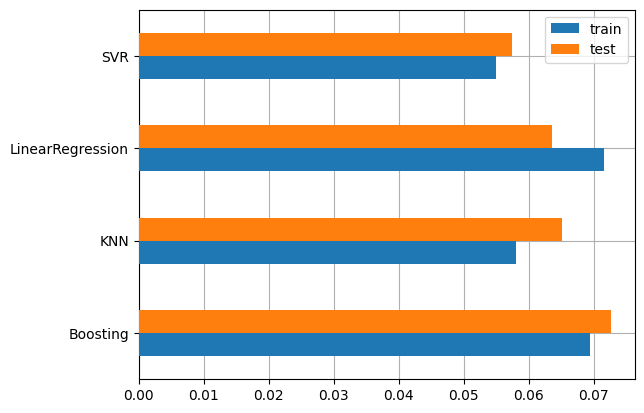

In [42]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

**Do prediction with data test**

In [43]:
prediction = X_test.iloc[:3].copy()
pred_dict = {'used_price':y_test[:3]}
for name, model in model_dict.items():
    pred_dict['prediction_'+name] = model.predict(prediction).round(6)
 
pd.DataFrame(pred_dict)

used_price  prediction_KNN  prediction_Boosting  \
1405    3.829293        3.836164             4.008550   
2734    5.054027        4.614673             4.653579   
386     4.210645        4.172643             4.386363   

      prediction_LinearRegression  prediction_SVR  
1405                     3.938171        3.635009  
2734                     4.620422        4.759636  
386                      4.323364        4.288576

Support Vector Regression (SVR) produces the smallest mse, We will choose this model as the best model for predicting used phone prices.